In [23]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c, a, b = symbols('x y z t u c a b')
sp.init_printing()
from sympy import Rational as R

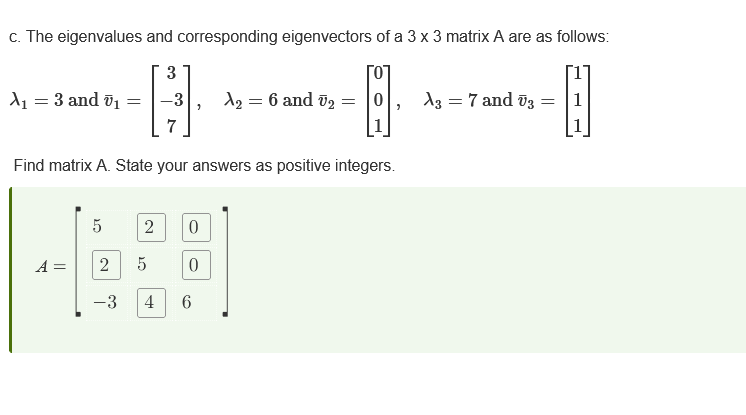

In [24]:
P = Matrix([[3, 0, 1], [-3, 0, 1],[7, 1, 1]])
Pinv = P**-1
display(Pinv)
D = diag(3, 6, 7)
display(Math(r'A = ' + latex(P*D*Pinv)))

⎡1/6   -1/6  0⎤
⎢             ⎥
⎢-5/3  2/3   1⎥
⎢             ⎥
⎣1/2   1/2   0⎦

<IPython.core.display.Math object>

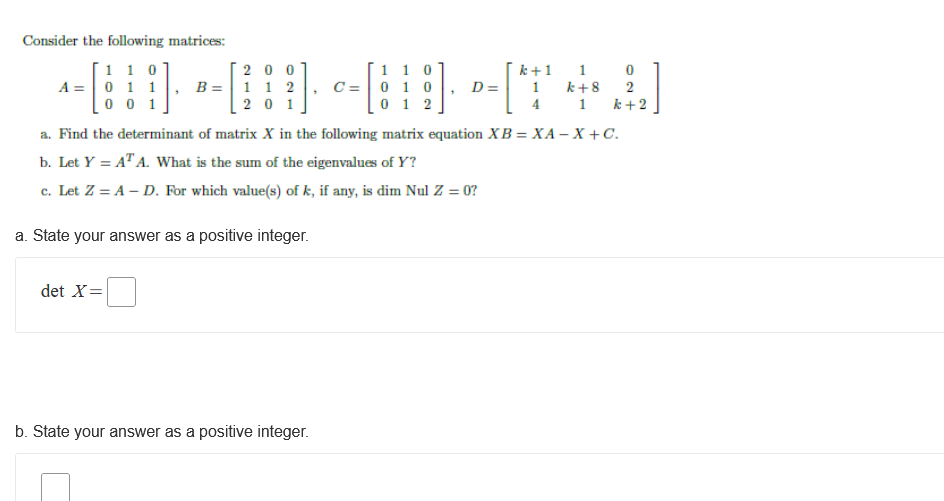

In [25]:
k = symbols('k')
A = Matrix([[1,1,0],[0,1,1],[0,0,1]])
B = Matrix([[2,0,0],[1,1,2],[2,0,1]])
C = Matrix([[1,1,0],[0,1,0],[0,1,2]])
D = Matrix([[k+1,1,0],[1,k+8,2],[4,1,k+2]])

a)
So here we must "isolate" matrix $X$, remembering all the rules of matrix algebra:

$$
XB = XA -X + C \\
XB - XA + X = C \\
X(B-A+I_3) = C \\
X = C(B-A+I_3)^{-1}
$$

We get:

In [26]:
X = C*(B-A+eye(3))**-1
display(Math(r'det(X)= ' + latex(det(X))))

<IPython.core.display.Math object>

b)

Remember the sum of the eigenvalues of a symmetric matrix is always the sum of its diagonal (sum of diagonal is also called trace):

In [27]:
Y = A.T * A
Y

⎡1  1  0⎤
⎢       ⎥
⎢1  2  1⎥
⎢       ⎥
⎣0  1  2⎦

In [28]:
trace(Y)

In [29]:
Z = A - D
Z.echelon_form()

⎡-1    -k - 7           -1        ⎤
⎢                                 ⎥
⎢       2                         ⎥
⎢0   - k  - 7⋅k         -k        ⎥
⎢                                 ⎥
⎢                   3      2      ⎥
⎣0       0       - k  - 8⋅k  - 6⋅k⎦

 Dim Nul Z = 0 means that the nullspace is empty. This only happens when there is a pivot in each column. A pivot in each column occurs when there is a non-zero value in all pivot positions: so we look at the last 2 rows We now know that dim Nul Z = 0 when $-k^{3}-8k^{2}-6k \neq 0 \text{ and } -k^{2}-7k \neq 0 $

In [30]:
solve(-k**3-8*k**2-6*k, k), solve(-k**2-7*k, k)

So we just need to make sure that $k$ is **not** one of these values. That means that only three of the choices will make dim Nul Z = 0:

$$
k=-8-2 \sqrt{10} \approx-14.32 \\
k=-8+2 \sqrt{10} \approx-1.68  \\
k = 7
$$

(So kind of the "opposite" of what many answered).

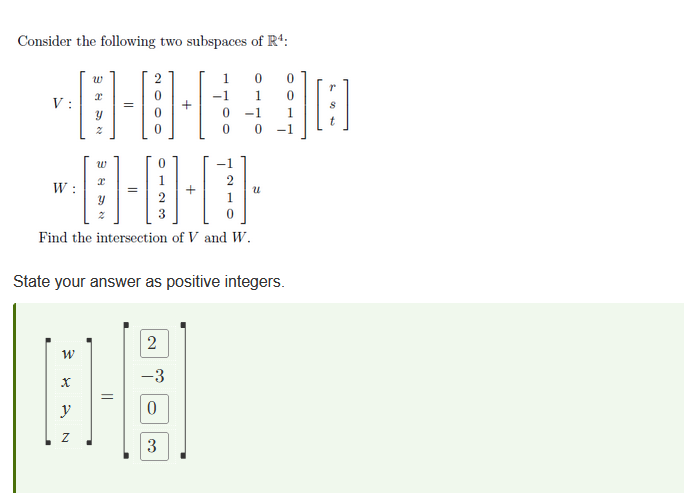

Very few had this one right. The method is simply set the two expressions equal to each other. Place the "intersections" on one side and the Matrices with their paramaters on the other side. We get:

$$
\left[\begin{array}{l}
2 \\
0 \\
0 \\
0
\end{array}\right]+\left[\begin{array}{rrr}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1 & 1 \\
0 & 0 & -1
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t
\end{array}\right] = \left[\begin{array}{l}
0 \\
1 \\
2 \\
3
\end{array}\right]+\left[\begin{array}{r}
-1 \\
2 \\
1 \\
0
\end{array}\right] u
$$

$$
\left[\begin{array}{rrr}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1 & 1 \\
0 & 0 & -1
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t
\end{array}\right] -
\left[\begin{array}{r}
-1 \\
2 \\
1 \\
0
\end{array}\right] u =
\left[\begin{array}{l}
0 \\
1 \\
2 \\
3
\end{array}\right] - \left[\begin{array}{l}
2 \\
0 \\
0 \\
0
\end{array}\right]
$$

We can now combine the left-hand sides in to one matrix since the two parts are merely linear combinations. Similarly we subtract the right-hand sides.

$$
\left[\begin{array}{rrr}
1 & 0 & 0 & 1 \\
-1 & 1 & 0 & -2\\
0 & -1 & 1 & -1\\
0 & 0 & -1 & 0\\
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t \\
u
\end{array}\right] =
\left[\begin{array}{l}
-2 \\
1 \\
2 \\
3
\end{array}\right]
$$

In [31]:
Matrix([[1,0,0,1, -2],
        [-1,1,0,-2, 1],
        [0,-1,1,-1, 2],
        [0,0,-1,0, 3]]).rref()[0]

⎡1  0  0  0  0 ⎤
⎢              ⎥
⎢0  1  0  0  -3⎥
⎢              ⎥
⎢0  0  1  0  -3⎥
⎢              ⎥
⎣0  0  0  1  -2⎦

So now we just use the value of u and plug it in to W and get the values of the intersection:

In [32]:
Matrix([[0],[1],[2],[3]]) -2*Matrix([[-1],[2],[1],[0]])

⎡2 ⎤
⎢  ⎥
⎢-3⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣3 ⎦

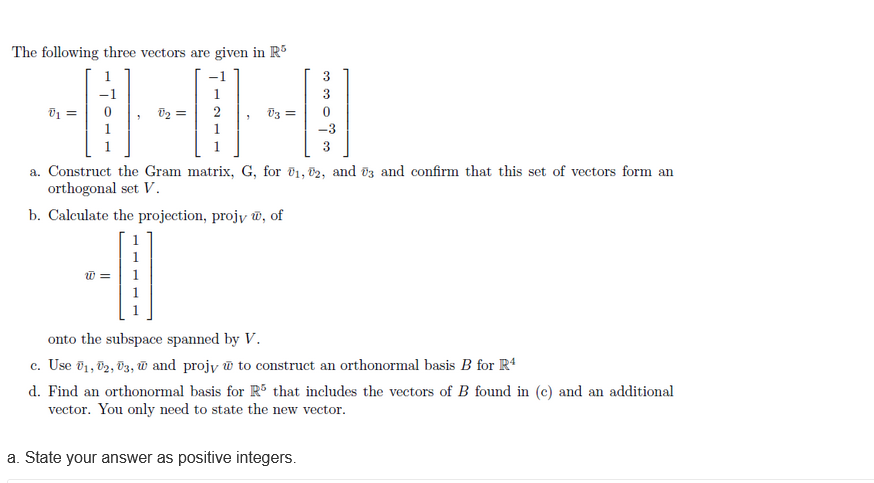


a)

Gram Matrix is the $A^T A$ matrix

In [33]:
v1 = Matrix([[1],[-1],[0],[1],[1]])
v2 = Matrix([[-1],[1],[2],[1],[1]])
v3 = Matrix([[3],[3],[0],[-3],[3]])
V = Matrix.hstack(v1, v2, v3)
V.T*V

⎡4  0  0 ⎤
⎢        ⎥
⎢0  8  0 ⎥
⎢        ⎥
⎣0  0  36⎦

In [34]:
#b)
w = Matrix([1,1,1,1,1])

proj = w.project(v1) + w.project(v2) + w.project(v3)
proj

⎡1/2⎤
⎢   ⎥
⎢1/2⎥
⎢   ⎥
⎢ 1 ⎥
⎢   ⎥
⎢1/2⎥
⎢   ⎥
⎣3/2⎦

c)

So the orthonormal basis will simply be the normalised versions of $\bar{v}_1$, $\bar{v}_2$, $\bar{v}_3$, and $\bar{w} - \operatorname{proj}_{V} \bar{w}$

In [35]:
v4 = w-proj
display(Math(latex(v1.normalized()) + ' , ' 
             + latex(v2.normalized()) + ' , '
             + latex(v3.normalized()) + ' , '
             + latex(v4.normalized())))

<IPython.core.display.Math object>

d)

So the last vector will be the orthogonal complement of the basis found in (c). We can determine this by using "the trick", i.e. find the nullspace of the transpose of the above basis:

In [36]:
Matrix.vstack(v1.T, v2.T, v3.T, v4.T).nullspace()[0].normalized()

⎡-√2 ⎤
⎢────⎥
⎢ 4  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎢ 4  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎢ 4  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎣ 4  ⎦

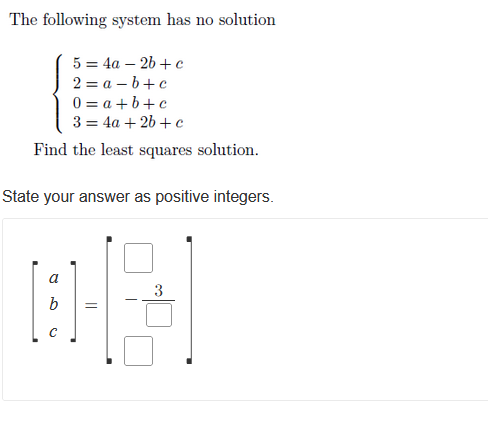

In [37]:
A = Matrix([[4, -2, 1],
            [1, -1, 1],
            [1, 1, 1],
            [4, 2, 1]])
y = Matrix([5, 2, 0, 3])
AtA = A.T * A
Aty = A.T * y

Matrix.hstack(AtA, Aty).rref()[0][:,-1]

⎡ 1  ⎤
⎢    ⎥
⎢-3/5⎥
⎢    ⎥
⎣ 0  ⎦

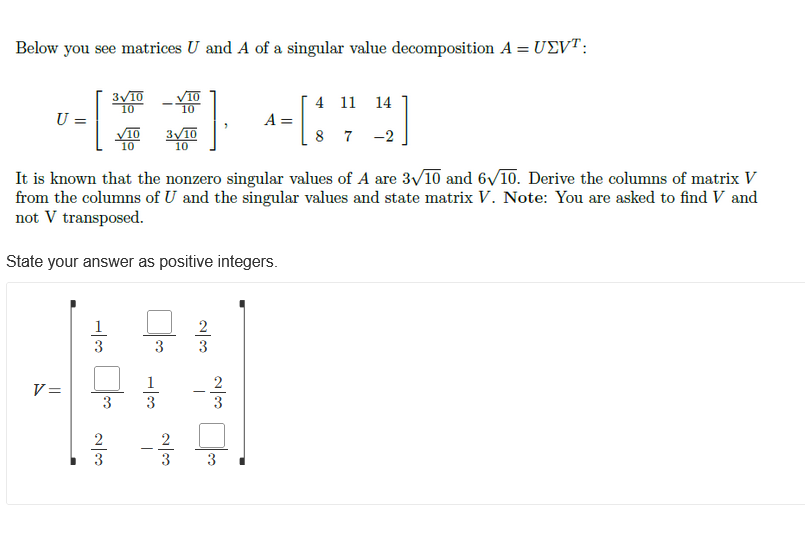

In [38]:
A = Matrix([[4,11,14],[8,7,-2]])
U = Matrix([[(3*sqrt(10))/(10),-(sqrt(10))/(10)],
            [(sqrt(10))/(10),(3*sqrt(10))/(10)]])

u1 = U[:,0]
u2 = U[:,1]

s1 = 6*sqrt(10)
s2 = 3*sqrt(10)

vt1 = s1**-1 * u1.T * A
vt2 = s2**-1 * u2.T * A

vt3 = Matrix.vstack(vt1, vt2).nullspace()[0].T.normalized()

Vt = Matrix.vstack(vt1, vt2, vt3)
V = Vt.T
V

⎡1/3  2/3   2/3 ⎤
⎢               ⎥
⎢2/3  1/3   -2/3⎥
⎢               ⎥
⎣2/3  -2/3  1/3 ⎦

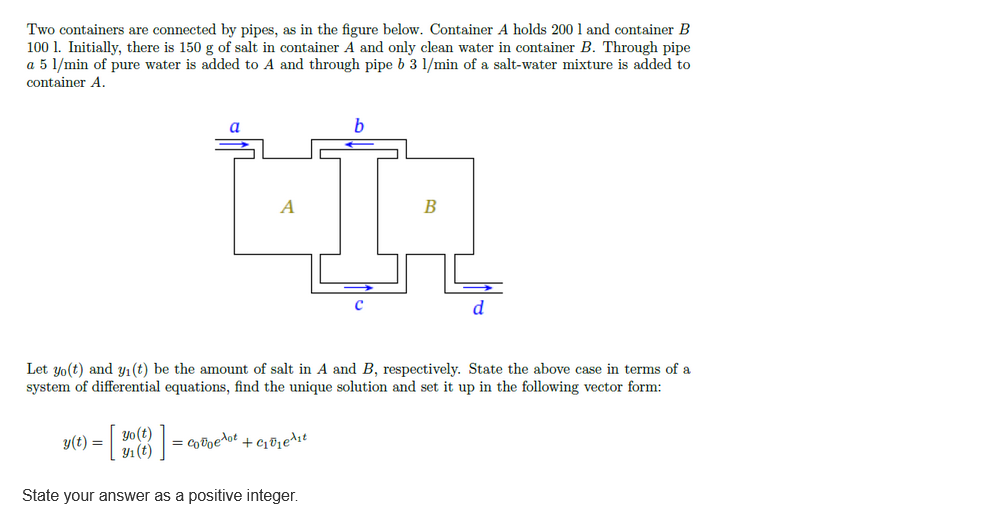

In [40]:
from sympy import symbols, Matrix, solve, det, eye, exp, Rational

A = Matrix([[Rational(-8,200), Rational(3,100)], [Rational(8,200), Rational(-8,100)]])

l = symbols('l')
eigenvals = solve(det(A - l*eye(2)), l)
l1, l2 = eigenvals

v1 = (A - l1*eye(2)).nullspace()[0]
v2 = (A - l2*eye(2)).nullspace()[0]

y0 = Matrix([150, 0])
rref = v1.row_join(v2).row_join(y0).rref()[0]
C = rref[:, -1]

t = symbols('t')
print(f"y(t) = {C[0]}*{v1}*exp({l1}*t) + {C[1]}*{v2}*exp({l2}*t)")

y(t) = -75*Matrix([[-1/2], [1]])*exp(-1/10*t) + 75*Matrix([[3/2], [1]])*exp(-1/50*t)
